In [16]:
!lspci | grep NVIDIA

01:00.0 3D controller: NVIDIA Corporation GM107M [GeForce GTX 950M] (rev a2)


In [17]:
import tensorflow as tf

In [18]:
tf.test.is_gpu_available()

True

In [19]:
import keras.datasets.mnist as mnist

In [22]:
help(mnist)

Help on module keras.datasets.mnist in keras.datasets:

NAME
    keras.datasets.mnist - MNIST handwritten digits dataset.

FUNCTIONS
    load_data(path='mnist.npz')
        Loads the MNIST dataset.
        
        # Arguments
            path: path where to cache the dataset locally
                (relative to ~/.keras/datasets).
        
        # Returns
            Tuple of Numpy arrays: `(x_train, y_train), (x_test, y_test)`.

DATA
    absolute_import = _Feature((2, 5, 0, 'alpha', 1), (3, 0, 0, 'alpha', 0...
    division = _Feature((2, 2, 0, 'alpha', 2), (3, 0, 0, 'alpha', 0), 8192...
    print_function = _Feature((2, 6, 0, 'alpha', 2), (3, 0, 0, 'alpha', 0)...

FILE
    /home/mrikum7/anaconda3/lib/python3.7/site-packages/keras/datasets/mnist.py




In [23]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [27]:
from matplotlib import pyplot

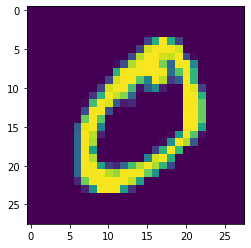

In [30]:
pyplot.imshow(x_train[1])

In [31]:
print(y_train[1])

0


In [32]:
x_train.shape

(60000, 28, 28)

In [33]:
from tensorflow import keras

In [34]:
model = keras.Sequential()

In [36]:
model.add(keras.layers.Dense(1000, activation = 'relu',
                             input_shape = (28 * 28, )))

In [37]:
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [38]:
x_train = x_train/255

In [39]:
x_test = x_test/255

In [41]:
X_train = x_train.reshape((60000, 28 * 28))

In [44]:
X_test = x_test.reshape((10000, 28 * 28))

In [45]:
from keras.utils import to_categorical

In [46]:
y_train = to_categorical(y_train)

In [47]:
y_test = to_categorical(y_test)

In [48]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(optimizer = keras.optimizers.SGD(lr = 0.1), 
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [50]:
model.fit(X_train, y_train, epochs = 5, batch_size = 128)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 117us/sample - loss: 0.4324 - accuracy: 0.8864
Epoch 2/5
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2393 - accuracy: 0.9329
Epoch 3/5
60000/60000 [==============================] - 5s 90us/sample - loss: 0.1893 - accuracy: 0.9467
Epoch 4/5
60000/60000 [==============================] - 5s 84us/sample - loss: 0.1568 - accuracy: 0.9567
Epoch 5/5
60000/60000 [==============================] - 5s 90us/sample - loss: 0.1342 - accuracy: 0.9631


In [52]:
val = model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [53]:
val

[0.12781302507556974, 0.9637]

In [55]:
out = model.predict(X_train)[0]

In [57]:
sum(out)

0.9999999730390436